In [7]:
import csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import joblib

In [9]:
# Load dataset using CSV module with error handling
data = []

# Increase the field size limit to avoid the error
csv.field_size_limit(1000000)

with open('dataset.csv', 'r', encoding='utf-8', errors='ignore') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        data.append(row)

# Convert data to DataFrame
df = pd.DataFrame(data[1:], columns=data[0])
df

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2854,win $ 300usd and a cruise !,"raquel 's casino , inc . is awarding a cruise ...",1
2855,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2856,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2857,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [10]:
# Preprocess data (handle missing values)
df.fillna('', inplace=True)  # Replace NaN with empty string

In [11]:
# Combine 'subject' and 'body' columns for text feature
X = df['subject'] + ' ' + df['body']
y = df['label']

In [15]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Data Successfully Split')

Data Successfully Split


In [17]:
# Feature extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Save the TF-IDF vectorizer as a pickle file
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')



['tfidf_vectorizer.pkl']

In [18]:
# Train a KNN model
model = KNeighborsClassifier(n_neighbors=5)  # Instantiate KNN classifier with 5 neighbors (adjust as needed)
model.fit(X_train_tfidf, y_train)

# Save the trained model as a pickle file
joblib.dump(model, 'knn_model.pkl')

# Make predictions
y_pred = model.predict(X_test_tfidf)

In [19]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


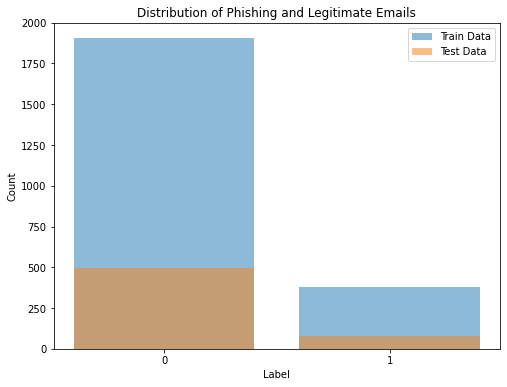

In [20]:
# Plot bar chart of label distribution
train_labels_count = y_train.value_counts()
test_labels_count = y_test.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(train_labels_count.index, train_labels_count.values, alpha=0.5, label='Train Data')
plt.bar(test_labels_count.index, test_labels_count.values, alpha=0.5, label='Test Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Emails')
plt.legend()
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


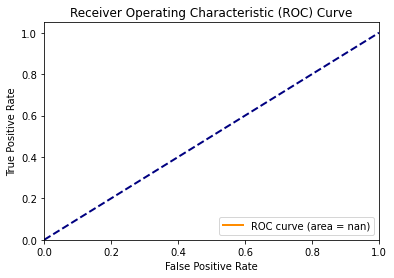

In [21]:
# Plot ROC Curve
y_test_bin = label_binarize(y_test, classes=['legitimate', 'phishing'])
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


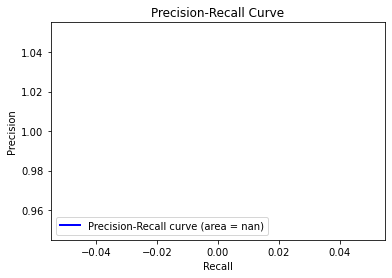

In [22]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

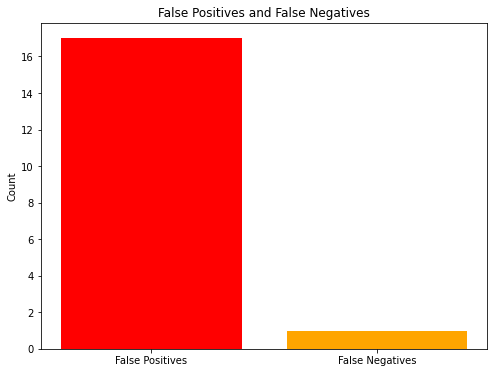

In [23]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate false positives and false negatives
false_positives = conf_matrix[0, 1]
false_negatives = conf_matrix[1, 0]

# Plot false positives and false negatives
plt.figure(figsize=(8, 6))
labels = ['False Positives', 'False Negatives']
values = [false_positives, false_negatives]
plt.bar(labels, values, color=['red', 'orange'])
plt.ylabel('Count')
plt.title('False Positives and False Negatives')
plt.show()

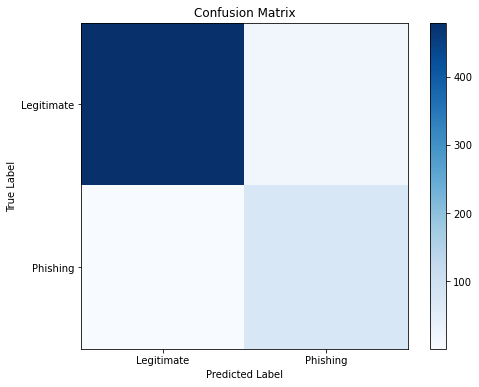

In [24]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.yticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()

In [25]:

# Display accuracy as text
print(f'Accuracy: {accuracy}')

Accuracy: 0.9685314685314685


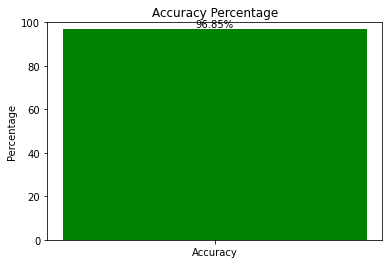

In [26]:
# Plot accuracy percentage with annotation
plt.figure(figsize=(6, 4))
bar = plt.bar('Accuracy', accuracy * 100, color='green')
plt.ylabel('Percentage')
plt.title('Accuracy Percentage')
plt.ylim(0, 100)

# Annotate the bar with the accuracy value
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
#WARNING: THIS CODE WAS EXECUTED IN PYCHARM IDE

import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load your KNN model
@st.cache(allow_output_mutation=True)
def load_model():
    model = joblib.load("knn_model.pkl")  # Load your trained KNN model
    return model

# Function to preprocess input text
def preprocess_text(text):
    # Preprocess your text data here (e.g., tokenization, stop word removal, etc.)
    return text

def main():
    st.title('Phishing Email Detector')

    # Load your KNN model
    model = load_model()

    # Input text for prediction
    text_input = st.text_area('Enter email text:', 'Type here...')
    if st.button('Predict'):
        # Preprocess input text
        preprocessed_text = preprocess_text(text_input)

        # Load TF-IDF vectorizer
        tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")  # Load your TF-IDF vectorizer

        # Transform preprocessed text into TF-IDF features
        input_tfidf = tfidf_vectorizer.transform([preprocessed_text])

        # Make prediction
        prediction = model.predict(input_tfidf)[0]
        if prediction == 'legitimate':
            st.success('Prediction: Legitimate Email')
        else:
            st.error('Prediction: Phishing Email')

if __name__ == "__main__":
    main()
